# NIfTI

In [2]:
import dicom2nifti

In [8]:
path_to_dicom = "../imgs/mri_dicom_dir/SE000001/"

In [10]:
dicom2nifti.convert_directory(path_to_dicom, "../imgs/")

In [11]:
import nibabel as nib
import matplotlib.pyplot as plt

In [12]:
nifti = nib.load("../imgs/201_t2w_tse.nii.gz")

In [13]:
print(nifti)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine:
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

In [9]:
nifti.header["qoffset_y"]

array(-80.33934, dtype=float32)

In [10]:
nifti.shape

(256, 256, 10)

In [11]:
image_array = nifti.get_fdata()

## Display Images

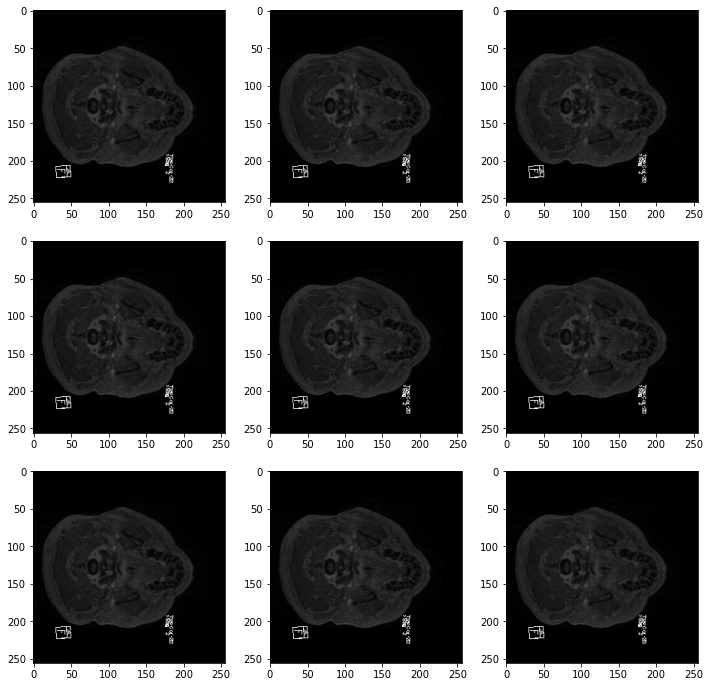

In [13]:
fig, axis = plt.subplots(3,3,figsize=(12,12))

counter = 0
for row in range(3):
    for column in range(3):
        axis[row][column].imshow(image_array[:,:,counter], cmap="gray")

## Normalization

In [14]:
image_array_processed = image_array * (image_array > 300)

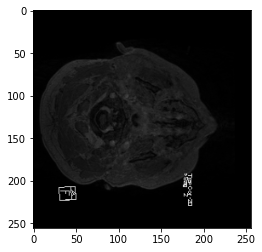

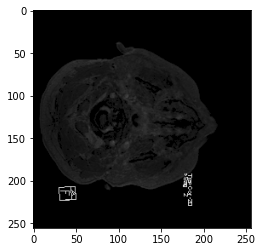

In [15]:
plt.figure()
plt.imshow(image_array[:,:,9], cmap="gray")
plt.figure()
plt.imshow(image_array_processed[:,:,9], cmap="gray")

In [18]:
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine)

In [19]:
nib.save(processed_nifti, "imgs/nifti/15_axial_mprage_post_reformat.nii.gz")